In [16]:
import PIL
import numpy as np
from IPython.display import Image 
import cv2

In [20]:
def get_background_percentage(tile):
    display(tile)
    
    #convert tile to strict black and white (not greyscale)
    grey = tile.convert("L")
    bw = grey.point(lambda x: 0 if x< 225 else 255)
    display(bw)

    #floodfill black and white image
    des = cv2.bitwise_not(np.array(bw))
    contour,hier = cv2.findContours(des,cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)

    for cnt in contour:
        cv2.drawContours(des,[cnt],0,255,-1)
    bw_fill = cv2.bitwise_not(des)
    display(PIL.Image.fromarray(bw_fill))
    
    #calculate background %
    bw_arr = np.array(bw_fill)
    black_cells = np.count_nonzero(bw_arr == 0)
    white_cells = np.count_nonzero(bw_arr == 255)
    return white_cells/(white_cells+black_cells)

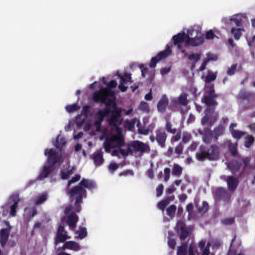

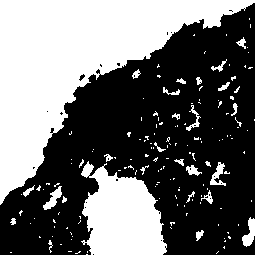

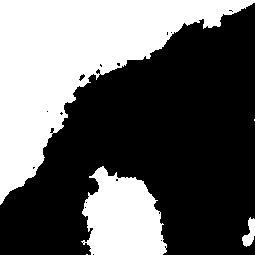

0.3917108804306036


In [21]:
im = PIL.Image.open("img/test1.jpeg")
background = get_background_percentage(im)
print(background)

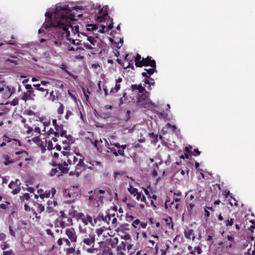

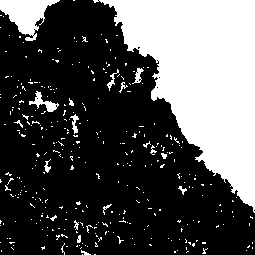

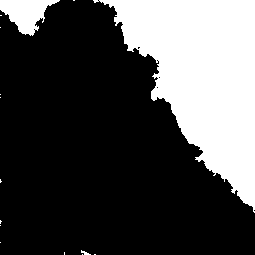

0.28959630911188006


In [22]:
im = PIL.Image.open("img/test2.jpeg")
background = get_background_percentage(im)
print(background)

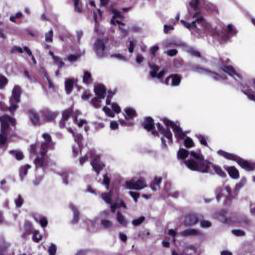

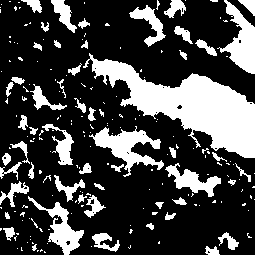

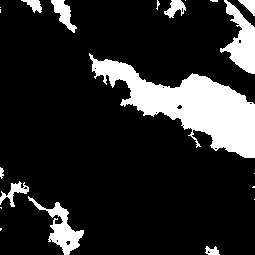

0.15846212995001924


In [18]:
im = PIL.Image.open("img/test3.jpeg")
background = get_background_percentage(im)
print(background)